In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import json
import math

import scipy.stats as sp

import statsmodels.api as sm
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression


file = "Resources/Caffeine/caffeine.csv"
file = pd.read_csv(file)
file.head()


,drink,Volume (ml),Calories,Caffeine (mg),type
0,Costa Coffee,256.993715,0,277,Coffee
1,Coffee Friend Brewed Coffee,250.191810,0,145,Coffee
2,Hell Energy Coffee,250.191810,150,100,Coffee
3,Killer Coffee (AU),250.191810,0,430,Coffee
4,Nescafe Gold,250.191810,0,66,Coffee


In [2]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   drink          610 non-null    object 
 1   Volume (ml)    610 non-null    float64
 2   Calories       610 non-null    int64  
 3   Caffeine (mg)  610 non-null    int64  
 4   type           610 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 24.0+ KB


In [3]:
file['type'].value_counts()

Energy Drinks    219
Coffee           173
Soft Drinks       90
Tea               66
Energy Shots      36
Water             26
Name: type, dtype: int64

In [4]:
file.describe()

,Volume (ml),Calories,Caffeine (mg)
count,610.000000,610.000000,610.000000
mean,346.543630,75.527869,134.693443
std,143.747738,94.799919,155.362861
min,7.393375,0.000000,0.000000
25%,236.588000,0.000000,50.000000
50%,354.882000,25.000000,100.000000
75%,473.176000,140.000000,160.000000
max,1419.528000,830.000000,1555.000000


In [5]:
#Copy data frame
df = file.copy()

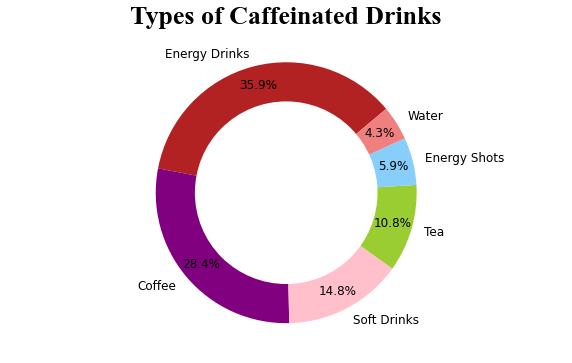

In [6]:
drink_types = df.type.value_counts().index.tolist()
drink_type_counts = df.type.value_counts().values.tolist()
colors = ["firebrick", "purple", "pink", "yellowgreen", "lightskyblue", "lightcoral"]
explode = (0, 0, 0, 0, 0, 0)

fig = plt.figure(figsize=(10,6))

plt.title("Types of Caffeinated Drinks", fontsize = 26, fontweight = "bold", font = "Times New Roman")
plt.axis("equal")

centre_circle = plt.Circle((0,0), 0.70, fc='white')


plt.pie(drink_type_counts, explode=explode, labels=drink_types, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=40, textprops={'fontsize': 12}, pctdistance=0.85)

fig.gca().add_artist(centre_circle)
plt.show()

In [7]:
file

,drink,Volume (ml),Calories,Caffeine (mg),type
0,Costa Coffee,256.993715,0,277,Coffee
1,Coffee Friend Brewed Coffee,250.191810,0,145,Coffee
2,Hell Energy Coffee,250.191810,150,100,Coffee
3,Killer Coffee (AU),250.191810,0,430,Coffee
4,Nescafe Gold,250.191810,0,66,Coffee
...,...,...,...,...,...
605,Pep Talk Sparkling Water,354.882000,0,55,Water
606,Polar Seltzer Water,354.882000,0,0,Water
607,Yerbae Sparkling Water,354.882000,0,100,Water
608,Tonic Water,295.735000,110,0,Water


In [8]:
#Dataframe for Energy Shot sorted by Caffeine
types=['Coffee', 'Energy Drinks', 'Energy Shots', 'Soft Drinks', 'Tea',
       'Water']
dfes = file.loc[file.type=="Energy Shots"].reset_index()
dfes = dfes.sort_values(by=['Caffeine (mg)'], ascending=False)
dfes = dfes.drop(['index'], axis=1)
dfes.head(1)

,drink,Volume (ml),Calories,Caffeine (mg),type
0,Spike Energy Double Shot,125.98311,0,350,Energy Shots


In [9]:
#Dataframe for Coffee sorted by Caffeine
types=['Coffee', 'Energy Drinks', 'Energy Shots', 'Soft Drinks', 'Tea',
       'Water']
dfc = file.loc[file.type=="Coffee"].reset_index()
dfc = dfc.sort_values(by=['Caffeine (mg)'], ascending=False)
dfc = dfc.drop(['index'], axis=1)
dfc.head(1)

,drink,Volume (ml),Calories,Caffeine (mg),type
85,Black Label Brewed Coffee,354.882,0,1555,Coffee


In [10]:
#Dataframe for Energy Drink sorted by Caffeine
types=['Coffee', 'Energy Drinks', 'Energy Shots', 'Soft Drinks', 'Tea',
       'Water']
dfed = file.loc[file.type=="Energy Drinks"].reset_index()
dfed = dfed.sort_values(by=['Caffeine (mg)'], ascending=False)
dfed = dfed.drop(['index'], axis=1)
dfed.head(1)


,drink,Volume (ml),Calories,Caffeine (mg),type
175,Hyde Xtreme,354.882,0,400,Energy Drinks


In [11]:
#Dataframe for Soft Drink sorted by Caffeine
types=['Coffee', 'Energy Drinks', 'Energy Shots', 'Soft Drinks', 'Tea',
       'Water']
dfsd = file.loc[file.type=="Soft Drinks"].reset_index()
dfsd = dfsd.sort_values(by=['Caffeine (mg)'], ascending=False)
dfsd = dfsd.drop(['index'], axis=1)
dfsd.head(1)

,drink,Volume (ml),Calories,Caffeine (mg),type
6,Bawls,473.176,190,102,Soft Drinks


In [12]:
#Dataframe for Tea sorted by Caffeine
types=['Coffee', 'Energy Drinks', 'Energy Shots', 'Soft Drinks', 'Tea',
       'Water'] 
dft = file.loc[file.type=="Tea"].reset_index()
dft = dft.sort_values(by=['Caffeine (mg)'], ascending=False)
dft = dft.drop(['index'], axis=1)
dft.head(1)


,drink,Volume (ml),Calories,Caffeine (mg),type
10,Inko's White Tea Energy,458.38925,100,165,Tea


In [13]:
#Dataframe for water sorted by Caffeine
types=['Coffee', 'Energy Drinks', 'Energy Shots', 'Soft Drinks', 'Tea',
       'Water']
dfw = file.loc[file.type=="Water"].reset_index()
dfw = dfw.sort_values(by=['Caffeine (mg)'], ascending=False)
dfw = dfw.drop(['index'], axis=1)
dfw.head(1)


,drink,Volume (ml),Calories,Caffeine (mg),type
14,Arti Sparkling Water,354.882,0,120,Water


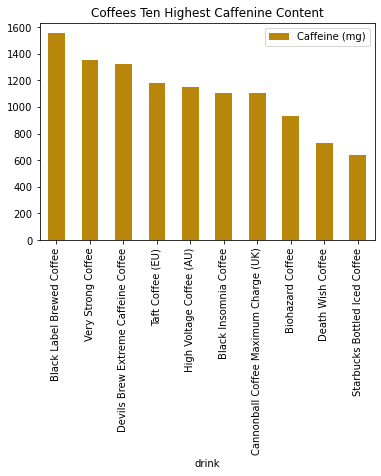

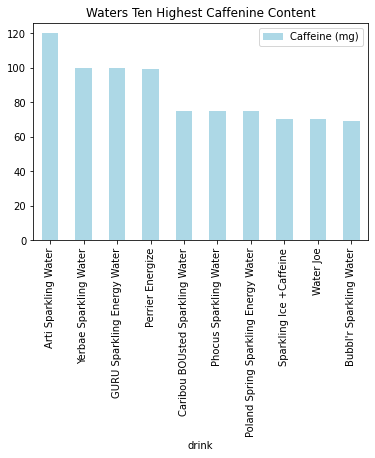

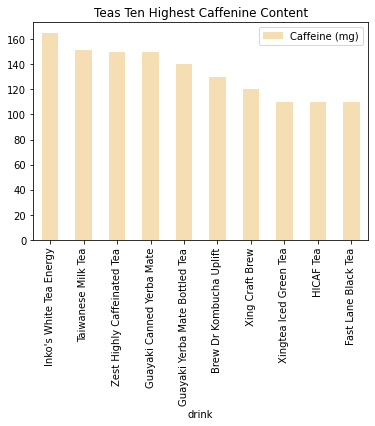

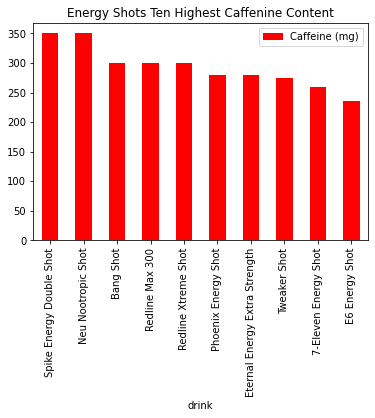

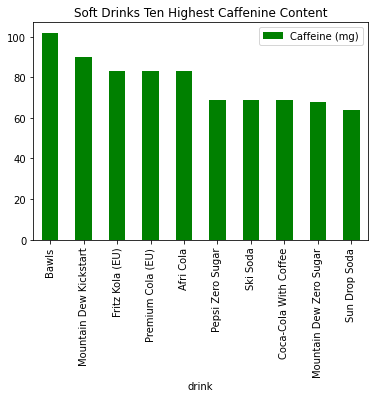

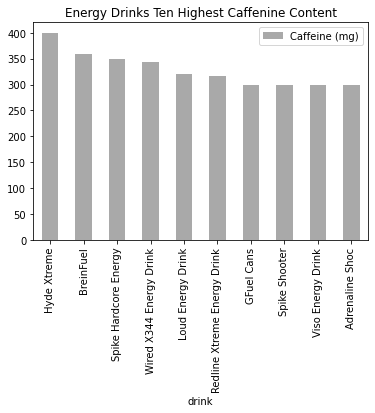

In [24]:
#Bar charts for top ten highest caffeine by type
s1 = dfc.loc[:, ["drink", "Caffeine (mg)"]].head(10).plot.bar(x='drink', title='Coffees Ten Highest Caffenine Content', color=['darkgoldenrod'])
s2 = dfw.loc[:, ["drink", "Caffeine (mg)"]].head(10).plot.bar(x= 'drink', title='Waters Ten Highest Caffenine Content', color=['lightblue'])
s3 = dft.loc[:, ["drink", "Caffeine (mg)"]].head(10).plot.bar(x= 'drink', title='Teas Ten Highest Caffenine Content', color=['wheat'])
s4 = dfes.loc[:, ["drink", "Caffeine (mg)"]].head(10).plot.bar(x= 'drink', title='Energy Shots Ten Highest Caffenine Content', color=['red'])
s5 = dfsd.loc[:, ["drink", "Caffeine (mg)"]].head(10).plot.bar(x= 'drink', title='Soft Drinks Ten Highest Caffenine Content', color=['green'])
s6 = dfed.loc[:, ["drink", "Caffeine (mg)"]].head(10).plot.bar(x= 'drink', title='Energy Drinks Ten Highest Caffenine Content', color=['darkgrey'])

plt.show()


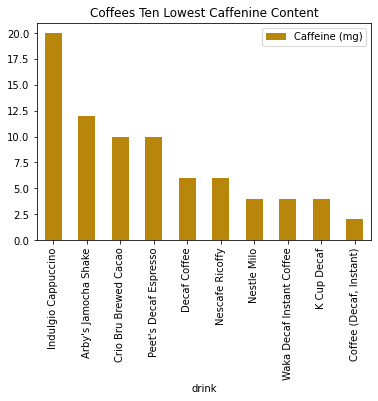

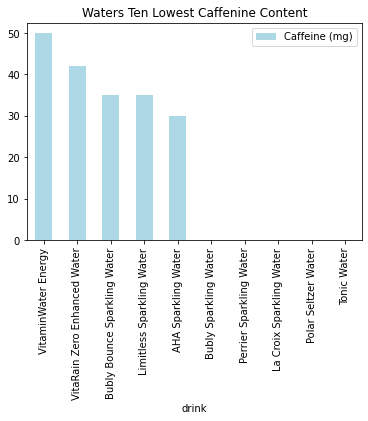

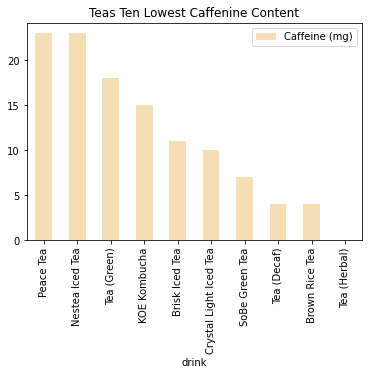

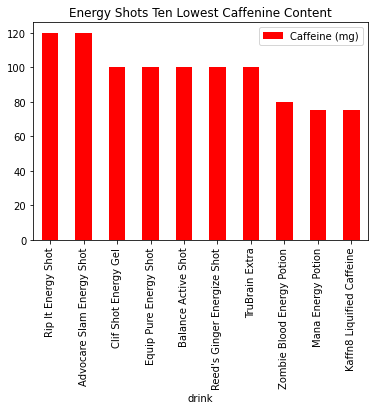

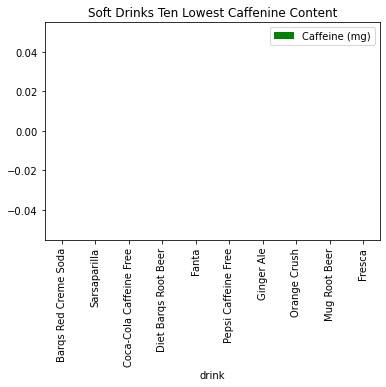

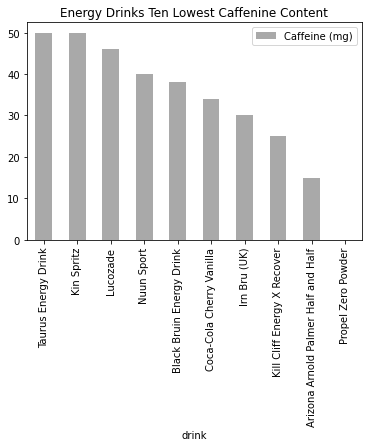

In [26]:
#Bar charts for lowest ten caffeine content by type
s1 = dfc.loc[:, ["drink", "Caffeine (mg)"]].tail(10).plot.bar(x='drink', title='Coffees Ten Lowest Caffenine Content', color=['darkgoldenrod'])
s2 = dfw.loc[:, ["drink", "Caffeine (mg)"]].tail(10).plot.bar(x= 'drink', title='Waters Ten Lowest Caffenine Content', color=['lightblue'])
s3 = dft.loc[:, ["drink", "Caffeine (mg)"]].tail(10).plot.bar(x= 'drink', title='Teas Ten Lowest Caffenine Content',color=['wheat'])
s4 = dfes.loc[:, ["drink", "Caffeine (mg)"]].tail(10).plot.bar(x= 'drink', title='Energy Shots Ten Lowest Caffenine Content', color=['red'])
s5 = dfsd.loc[:, ["drink", "Caffeine (mg)"]].tail(10).plot.bar(x= 'drink', title='Soft Drinks Ten Lowest Caffenine Content', color=['green'])
s6 = dfed.loc[:, ["drink", "Caffeine (mg)"]].tail(10).plot.bar(x= 'drink', title='Energy Drinks Ten Lowest Caffenine Content', color=['darkgrey'])

plt.show()

In [ ]:
file.type.value_counts()

In [ ]:
#Averages of each type without top ten
file.sort_values(["Caffeine (mg)"], ascending=False).groupby("type")["Caffeine (mg)"].mean()


In [ ]:
#AVG top 10
file.groupby("type")["Caffeine (mg)"].nlargest(10).mean(level=0).plot(kind="barh", color="maroon")
plt.show()

In [ ]:
#AVG low 10
file.groupby("type")["Caffeine (mg)"].nsmallest(10).mean(level=0).plot(kind="barh", color="green")
plt.show()
# ax = sns.barplot(x="drink", y='Caffeine (mg)', data=low)
# ax.bar_label(ax.containers[0])

In [ ]:
dfc10 = dfc.head(10)
dfc10.mean()

In [ ]:
dfw10 = dfw.head(10)
dfw10.mean()

In [ ]:
dft10 = dft.head(10)
dft10.mean()

In [ ]:
dfsd10 = dfsd.head(10)
dfsd10.mean()

In [ ]:
dfed10 = dfed.head(10)
dfed10.mean()

In [ ]:
dfes10 = dfes.head(10)
dfes10.mean()

In [ ]:
dfc10["Caffeine (mg)"].mean()

In [ ]:
# plt.barh("Coffee", data = dfc10["Caffeine (mg)"].mean(level=0), width=200, color = "maroon") 
# plt.barh("Water", data = dfw10, width=200, color = "maroon")
# plt.barh("Tea", data = dft10, width=200, color = "maroon")
# plt.barh("Soft Drink", data = dfsd10, width=200, color = "maroon")
# plt.barh("Energy Drink", data = dfed10, width=200, color = "maroon")
# # plt.barh("Energy Shot", data = dfes10, width=0.01, color = "maroon")
# plt.xlabel("Caffeine (mg)") 
# plt.ylabel("Caffeine Types") 
# plt.title("Average of types top tens")
# plt.show()

In [ ]:
# #dataframe for top ten highest caffeine sorted by brand 
# df1 = file.copy()
# # dfbs = df1.sort_values(by=['Caffeine (mg)'], ascending=False)
# # dfbs = df1.loc[df1.drink.str.contains('Starbucks')]
# # dfbs["brand"]="Starbucks"
# # dfbs

# types=['Dunkin', 'Starbucks', 'Peets']
# dfbs = df1.loc[df1.type=="Starbucks"].reset_index()
# dfbs = df1.sort_values(by=['Caffeine (mg)'], ascending=False)
# dfbs.head(1)


In [ ]:
# df_2 = pd.series([dfc, dfed, dfes, dfsd, dtf, dfw]).plot(kind="bar")
# df_2.show


In [ ]:
#Create a dataframe calling out individual brands for comparison
dfc = file.loc[file.drink.str.contains ("Starbucks")]
#Find max of caffine content per pop. type brand
dfc.value_counts("Caffeine (mg)")
dfc.max()

In [ ]:
#Create a dataframe calling out individual brands for comparison
dfc = file.loc[file.drink.str.contains ("Dunkin")]
#Find max of caffine content per pop. type brand
dfc.value_counts("Caffeine (mg)")
dfc.max()

In [ ]:
#Create a dataframe calling out individual brands for comparison
#dfw = file.loc[file.drink.str.contains ("MiO")]
#Find max of caffine content per pop. type brand
dfw.value_counts("Caffeine (mg)")
dfw.loc(dfw["Caffeine (mg)"] == dfw["Caffeine (mg)"].max())


TypeError: unhashable type: 'numpy.ndarray'

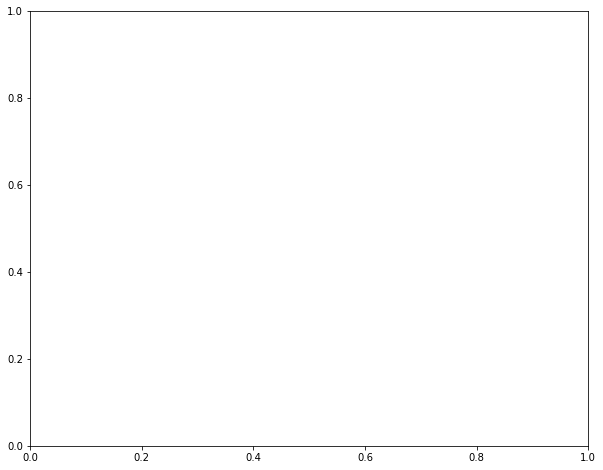

In [28]:
#find a way to loop through all 6 types to find the df.max beverage by caffeine content


max_caff = dfw[dfw['Caffeine (mg)'] == dfw['Caffeine (mg)'].max()]
max_caff

#Create a bar chart comparing all maxes, or which ever graph represents the data best
# step 1, get the data
# x =
# y =

# # step 2, init the plot
# fig = plt.figure(figsize=(10,8))
# plt.bar(x, y, color="firebrick")

# # step 3, customization
# plt.title("Popularity of Programming Languages")
# plt.ylabel("Number of Users")
# plt.grid(axis="y", alpha=0.25)

# # Sets the x limits of the current chart
# plt.xlim(-0.5, 4.5)

# # Sets the y limits of the current chart
# plt.ylim(0, 55000)

# # step 4, saving/showing
# plt.show()


In [ ]:
# max_dvt = file.set_index('drink','Caffeine (mg)').select_dtypes('str')
# max_dvt.head

In [ ]:
# type_group = file.groupby(["drink", "type"])
# print(type_group)

# type_group.count().head(5)

# df = pd.DataFrame(type_group)
# df

In [ ]:
# max_caff = df[['drink']].max()
# max_caff

In [ ]:


group0 = df[df["Volume (ml)"] == 0]["Calories"]
group1 = df[df["Volume (ml)"] == 1]["Calories"]
group2 = df[df["Volume (ml)"] == 2]["Calories"]
group3 = df[df["Volume (ml)"] == 3]["Calories"]
group4 = df[df["Volume (ml)"] == 4]["Calories"]

# Perform the ANOVA
stats.f_oneway(group0, group1, group2, group3, group4)


In [ ]:
stats.ttest_ind(group0, group4, equal_var=False)